<a href="https://colab.research.google.com/github/schauppi/Udemy_TensorFlow_Developer/blob/main/Exam_preparation/cnn_food101_small.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2021-09-16 06:49:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   111MB/s    in 4.8s    

2021-09-16 06:49:32 (104 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
!wget https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py

--2021-09-16 06:49:34--  https://raw.githubusercontent.com/schauppi/Udemy_TensorFlow_Developer/main/Exam_preparation/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5005 (4.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   4.89K  --.-KB/s    in 0s      

2021-09-16 06:49:34 (60.3 MB/s) - ‘helper_functions.py’ saved [5005/5005]



# Data preparation

## Unzip data

In [3]:
import zipfile

#Unzip the data
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
import os

#Check how many directories and images in unzipped file
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"{len(dirpath)} directories containing {len(filenames)} in {dirpath}")

24 directories containing 0 in 10_food_classes_all_data
30 directories containing 0 in 10_food_classes_all_data/train
44 directories containing 750 in 10_food_classes_all_data/train/chicken_wings
36 directories containing 750 in 10_food_classes_all_data/train/sushi
36 directories containing 750 in 10_food_classes_all_data/train/pizza
36 directories containing 750 in 10_food_classes_all_data/train/steak
40 directories containing 750 in 10_food_classes_all_data/train/ice_cream
44 directories containing 750 in 10_food_classes_all_data/train/chicken_curry
40 directories containing 750 in 10_food_classes_all_data/train/hamburger
41 directories containing 750 in 10_food_classes_all_data/train/fried_rice
45 directories containing 750 in 10_food_classes_all_data/train/grilled_salmon
36 directories containing 750 in 10_food_classes_all_data/train/ramen
29 directories containing 0 in 10_food_classes_all_data/test
43 directories containing 250 in 10_food_classes_all_data/test/chicken_wings
35 dir

In [5]:
test_dir = "/content/10_food_classes_all_data/test/"
train_dir = "/content/10_food_classes_all_data/train/"

## Visualize data

In [6]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [7]:
#Get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


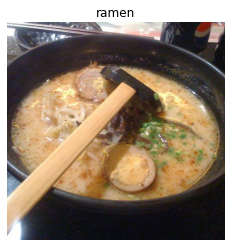

In [8]:
img = view_random_image(train_dir, random.choice(class_names))

## Preprocess data - Image DataGenerator with Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale data and create generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data from directories
train_data_gen = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data_gen = test_datagen.flow_from_directory(test_dir, 
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [10]:
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode="categorical")

Found 7500 images belonging to 10 classes.


# Modelling experiments

In [11]:
def plot_training_curve(history):
  plt.figure(figsize=(10,7))
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.legend()
  plt.title("Loss")
  plt.figure(figsize=(10,7))
  plt.plot(accuracy, label="accuracy")
  plt.plot(val_accuracy, label="val_accuracy")
  plt.legend()
  plt.title("Accuracy")

## Model 0: Baseline

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

#Build the model 

inputs = layers.Input(shape=(224, 224, 3))
x = layers.Conv2D(10, 3, activation="relu")(inputs)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(10, 3, activation="relu")(inputs)
x = layers.Conv2D(10, 3, activation="relu")(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_0 = tf.keras.Model(inputs, outputs)

In [ ]:
#Compile the model 
model_0.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
#Fit the model 
history_model_0 = model_0.fit(train_data_augmented,
                              epochs=5,
                              validation_data=test_data)

Epoch 1/5
235/235 [==============================] - 127s 542ms/step - loss: 2.2289 - accuracy: 0.2188 - val_loss: 1.9769 - val_accuracy: 0.3264
Epoch 2/5
235/235 [==============================] - 126s 538ms/step - loss: 2.0935 - accuracy: 0.2647 - val_loss: 1.9108 - val_accuracy: 0.3484
Epoch 3/5
235/235 [==============================] - 125s 534ms/step - loss: 2.0327 - accuracy: 0.2940 - val_loss: 1.9843 - val_accuracy: 0.3028
Epoch 4/5
235/235 [==============================] - 130s 552ms/step - loss: 1.9825 - accuracy: 0.3079 - val_loss: 1.8825 - val_accuracy: 0.3540
Epoch 5/5
235/235 [==============================] - 127s 542ms/step - loss: 1.9584 - accuracy: 0.3283 - val_loss: 1.9255 - val_accuracy: 0.3584


In [ ]:
#Evaluate the model 
model_0.evaluate(test_data)

79/79 [==============================] - 12s 155ms/step - loss: 1.9255 - accuracy: 0.3584


[1.9254814386367798, 0.35839998722076416]

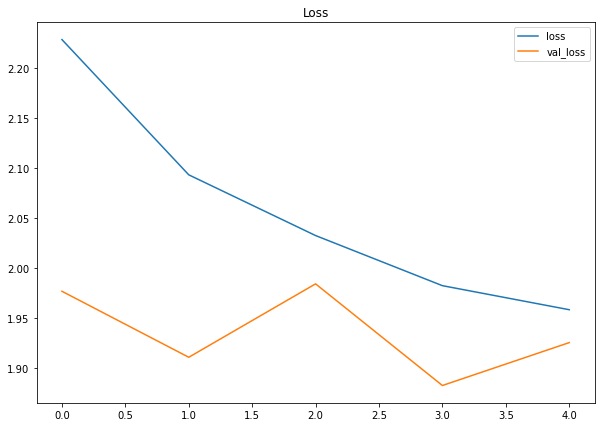

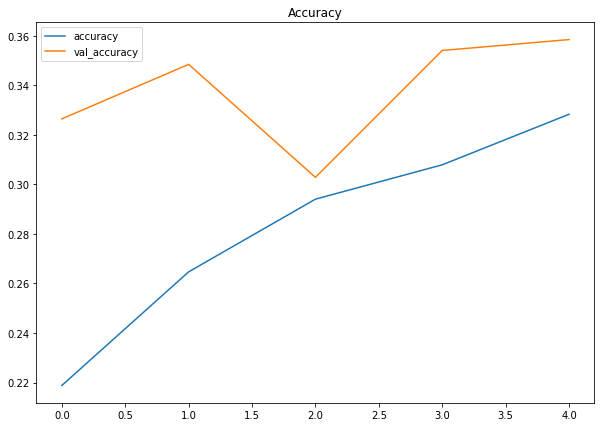

In [ ]:
#Plot loss curves
plot_training_curve(history_model_0)

## Model 1: Feature Extraction

### Create faster Datasets

In [ ]:
import tensorflow as tf

#Create faster datasets
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=IMG_SIZE,
                                                                 label_mode="categorical",
                                                                 batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir, 
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=32)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


###Create data augmentation layer

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = tf.keras.Sequential([
                                         preprocessing.RandomFlip("horizontal"),
                                         preprocessing.RandomRotation(0.2),
                                         preprocessing.RandomZoom(0.2),
                                         preprocessing.RandomHeight(0.2),
                                         preprocessing.RandomWidth(0.2)
])

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

In [ ]:
#Compile the model 
model_1.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
#Fit the model 
history_model_1 = model_1.fit(train_data,
                              epochs=5,
                              validation_data=test_data,
                              validation_steps=int(0.25*len(test_data)))

Epoch 1/5
235/235 [==============================] - 68s 258ms/step - loss: 1.0127 - accuracy: 0.6673 - val_loss: 0.4749 - val_accuracy: 0.8536
Epoch 2/5
235/235 [==============================] - 57s 240ms/step - loss: 0.6517 - accuracy: 0.7849 - val_loss: 0.4006 - val_accuracy: 0.8602
Epoch 3/5
235/235 [==============================] - 54s 228ms/step - loss: 0.5856 - accuracy: 0.8061 - val_loss: 0.4104 - val_accuracy: 0.8684
Epoch 4/5
235/235 [==============================] - 53s 225ms/step - loss: 0.5413 - accuracy: 0.8235 - val_loss: 0.3713 - val_accuracy: 0.8750
Epoch 5/5
235/235 [==============================] - 51s 217ms/step - loss: 0.4943 - accuracy: 0.8379 - val_loss: 0.3849 - val_accuracy: 0.8750


In [ ]:
#Evaluate 
model_1.evaluate(test_data)

79/79 [==============================] - 11s 128ms/step - loss: 0.3528 - accuracy: 0.8824


[0.35277798771858215, 0.8823999762535095]

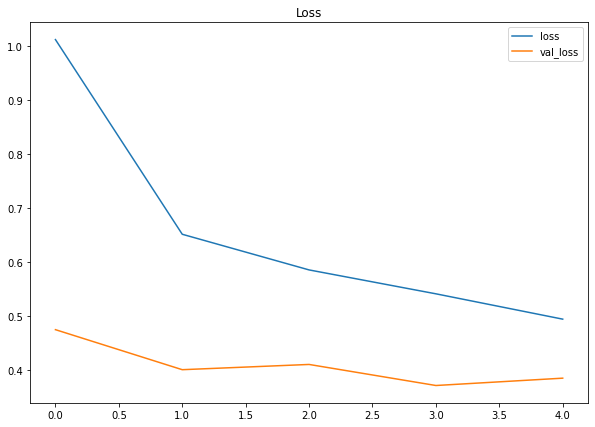

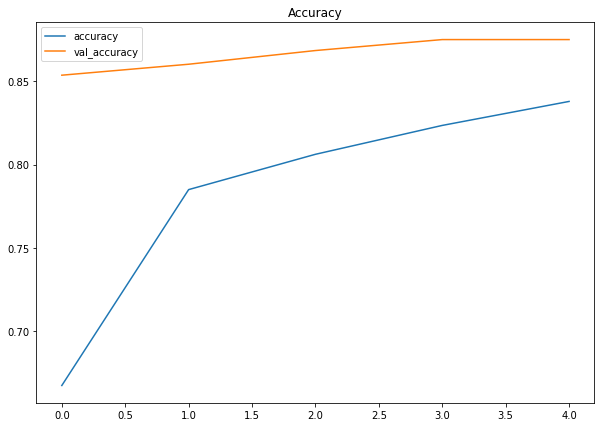

In [ ]:
#Plot loss curves
plot_training_curve(history_model_1)

## Model 2: Fine Tuning

In [ ]:
tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

In [ ]:
#Compile the model 
model_2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                81984     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330 

In [ ]:
#Fit the model 
history_model_2 = model_2.fit(train_data,
                              epochs=5,
                              validation_data=test_data,
                              validation_steps=int(0.25*len(test_data)))

Epoch 1/5
235/235 [==============================] - 58s 215ms/step - loss: 1.0006 - accuracy: 0.6720 - val_loss: 0.4367 - val_accuracy: 0.8586
Epoch 2/5
235/235 [==============================] - 50s 209ms/step - loss: 0.6497 - accuracy: 0.7871 - val_loss: 0.4021 - val_accuracy: 0.8766
Epoch 3/5
235/235 [==============================] - 47s 197ms/step - loss: 0.5870 - accuracy: 0.8113 - val_loss: 0.3533 - val_accuracy: 0.8799
Epoch 4/5
235/235 [==============================] - 48s 201ms/step - loss: 0.5271 - accuracy: 0.8256 - val_loss: 0.3636 - val_accuracy: 0.8668
Epoch 5/5
235/235 [==============================] - 47s 197ms/step - loss: 0.4942 - accuracy: 0.8403 - val_loss: 0.3590 - val_accuracy: 0.8898


In [ ]:
#Evaluate 
model_2.evaluate(test_data)

79/79 [==============================] - 11s 130ms/step - loss: 0.3278 - accuracy: 0.8936


[0.3277633488178253, 0.8935999870300293]

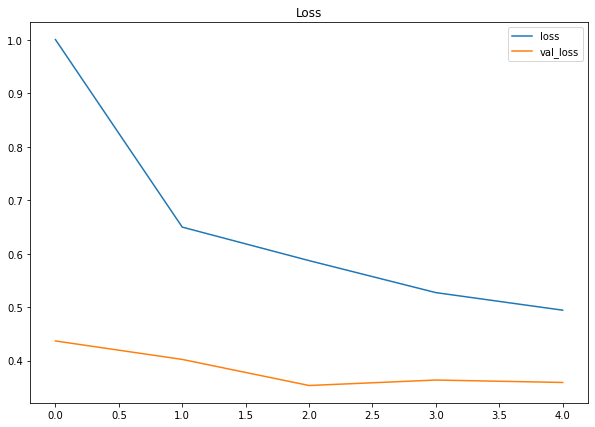

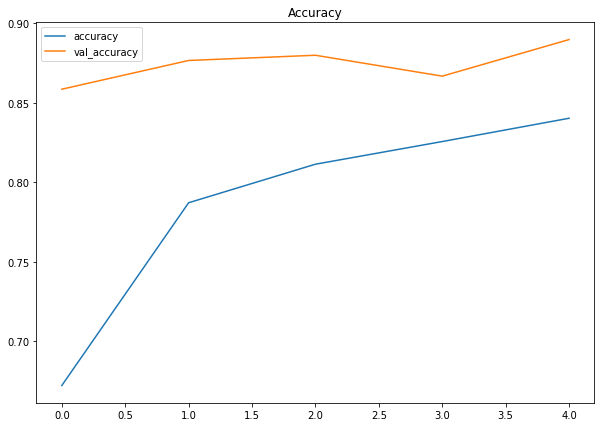

In [ ]:
#Plot loss curves
plot_training_curve(history_model_2)

In [ ]:
#Unfreeze all layers
base_model.trainable = True

#Freeze all layers except last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
#Compile the model 
model_2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
# What layers in the model are trainable?
for layer in model_2.layers:
  print(layer.name, layer.trainable)


input_7 True
sequential True
efficientnetb0 True
global_average_pooling2d_4 True
dense_7 True
dense_8 True
dense_9 True


In [ ]:
# Check which layers are trainable
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [ ]:
history_model_2_fine_tune = model_2.fit(train_data,
                                        epochs=10,
                                        validation_data=test_data,
                                        validation_steps=int(0.25*len(test_data)),
                                        initial_epoch=history_model_2.epoch[-1])

Epoch 5/10
235/235 [==============================] - 58s 212ms/step - loss: 0.6633 - accuracy: 0.7864 - val_loss: 0.4384 - val_accuracy: 0.8668
Epoch 6/10
235/235 [==============================] - 47s 195ms/step - loss: 0.4894 - accuracy: 0.8404 - val_loss: 0.3256 - val_accuracy: 0.8980
Epoch 7/10
235/235 [==============================] - 46s 194ms/step - loss: 0.4133 - accuracy: 0.8652 - val_loss: 0.3454 - val_accuracy: 0.8964
Epoch 8/10
235/235 [==============================] - 45s 190ms/step - loss: 0.3821 - accuracy: 0.8723 - val_loss: 0.3310 - val_accuracy: 0.8947
Epoch 9/10
235/235 [==============================] - 46s 192ms/step - loss: 0.3353 - accuracy: 0.8853 - val_loss: 0.3258 - val_accuracy: 0.8980
Epoch 10/10
235/235 [==============================] - 44s 186ms/step - loss: 0.2980 - accuracy: 0.9044 - val_loss: 0.3296 - val_accuracy: 0.8931


In [ ]:
#Evaluate
model_2.evaluate(test_data)

79/79 [==============================] - 11s 127ms/step - loss: 0.3318 - accuracy: 0.8984


[0.33176159858703613, 0.8984000086784363]

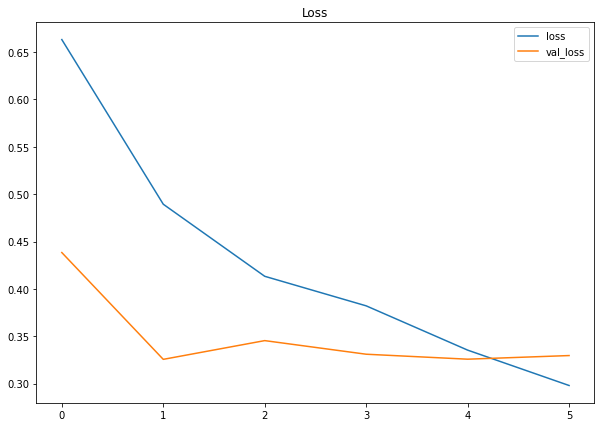

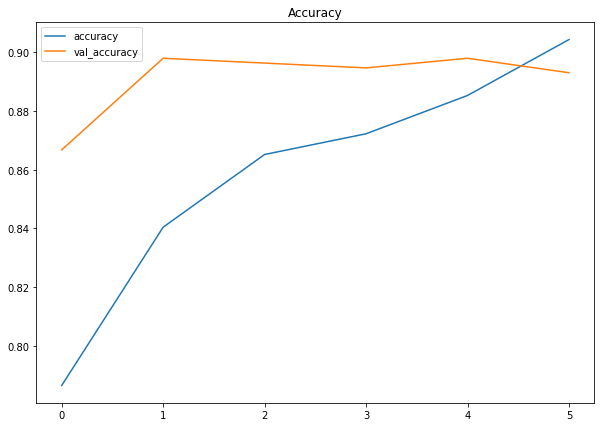

In [ ]:
#Plot loss curves
plot_training_curve(history_model_2_fine_tune)

## Model 3: Mobilenet

In [ ]:
import tensorflow_hub as hub

IMAGE_SHAPE = (224,224)

mobilenet_v3_large = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5"
mobilenet_v3_small = "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5"

feature_extraction_layer_large = hub.KerasLayer(mobilenet_v3_large, input_shape=(224,224,3), trainable=False)
feature_extraction_layer_small = hub.KerasLayer(mobilenet_v3_small, input_shape=(224,224,3), trainable=False)

In [ ]:
from tensorflow.keras import layers

tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(224,224,3))
x = feature_extraction_layer_small(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs)

In [ ]:
model_3.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
keras_layer_2 (KerasLayer)   (None, 1001)              2555993   
_________________________________________________________________
dropout_16 (Dropout)         (None, 1001)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               513024    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0  

In [ ]:
#Compile the model 
model_3.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
#Fit the model 
history_model_3 = model_3.fit(train_data_augmented,
                              epochs=6,
                              validation_data=test_data_gen,
                              validation_steps=int(0.25*len(test_data_gen)),
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

Epoch 1/6
235/235 [==============================] - 129s 474ms/step - loss: 1.2421 - accuracy: 0.6009 - val_loss: 0.6239 - val_accuracy: 0.8043
Epoch 2/6
235/235 [==============================] - 112s 477ms/step - loss: 0.8979 - accuracy: 0.7136 - val_loss: 0.5252 - val_accuracy: 0.8388
Epoch 3/6
235/235 [==============================] - 113s 481ms/step - loss: 0.8143 - accuracy: 0.7451 - val_loss: 0.5099 - val_accuracy: 0.8438
Epoch 4/6
235/235 [==============================] - 113s 479ms/step - loss: 0.7512 - accuracy: 0.7645 - val_loss: 0.4451 - val_accuracy: 0.8503
Epoch 5/6
235/235 [==============================] - 112s 478ms/step - loss: 0.7183 - accuracy: 0.7685 - val_loss: 0.5020 - val_accuracy: 0.8405
Epoch 6/6
235/235 [==============================] - 113s 479ms/step - loss: 0.6718 - accuracy: 0.7876 - val_loss: 0.4427 - val_accuracy: 0.8635


In [ ]:
#Evaluate
model_3.evaluate(test_data_gen)

79/79 [==============================] - 15s 187ms/step - loss: 0.4709 - accuracy: 0.8500


[0.4709451198577881, 0.8500000238418579]

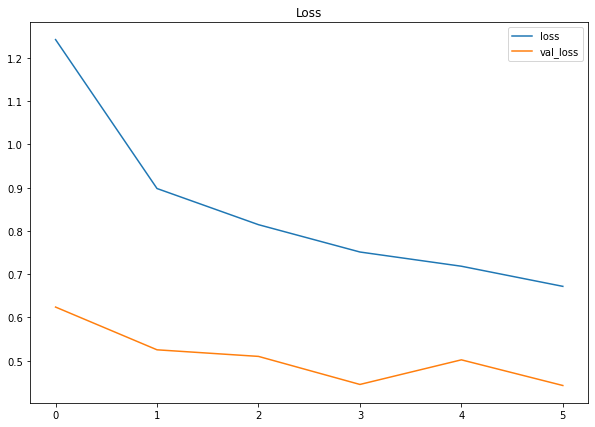

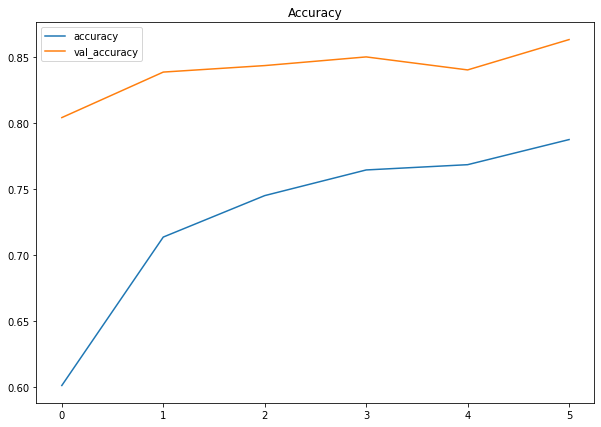

In [ ]:
#Plot loss curves
plot_training_curve(history_model_3)

## Model 4: Mobilenet V2 feature vector

In [13]:
import tensorflow_hub as hub

IMAGE_SHAPE = (224,224)

mobilenet_v2_feature_vec = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

feature_extraction_layer_v2 = hub.KerasLayer(mobilenet_v2_feature_vec ,input_shape=(224,224,3), trainable=False)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(224,224,3))
x = feature_extraction_layer_v2(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_4 = tf.keras.Model(inputs, outputs)

In [22]:
#Compile the model 
model_4.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [23]:
model_4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0     

In [24]:
#Fit the model 
history_model_4 = model_4.fit(train_data_augmented,
                              epochs=5,
                              validation_data=test_data_gen,
                              validation_steps=int(0.25*len(test_data_gen)),
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

Epoch 1/5
235/235 [==============================] - 151s 515ms/step - loss: 1.1758 - accuracy: 0.6112 - val_loss: 0.5462 - val_accuracy: 0.8372
Epoch 2/5
235/235 [==============================] - 122s 520ms/step - loss: 0.8450 - accuracy: 0.7259 - val_loss: 0.4532 - val_accuracy: 0.8454
Epoch 3/5
235/235 [==============================] - 122s 518ms/step - loss: 0.7630 - accuracy: 0.7508 - val_loss: 0.5144 - val_accuracy: 0.8438
Epoch 4/5
235/235 [==============================] - 124s 526ms/step - loss: 0.7218 - accuracy: 0.7737 - val_loss: 0.4635 - val_accuracy: 0.8520
Epoch 5/5
235/235 [==============================] - 123s 525ms/step - loss: 0.6695 - accuracy: 0.7881 - val_loss: 0.4301 - val_accuracy: 0.8553


In [39]:
#Evaluate
model_4.evaluate(test_data_gen)

79/79 [==============================] - 15s 186ms/step - loss: 0.4322 - accuracy: 0.8572


[0.4321540594100952, 0.857200026512146]

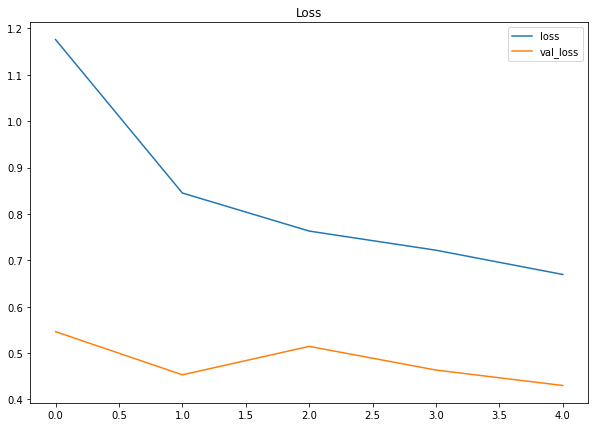

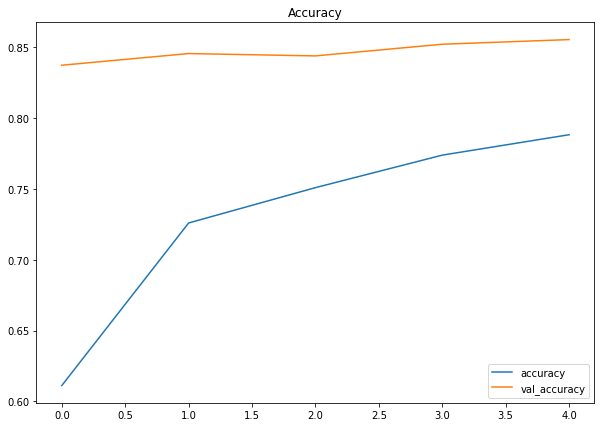

In [25]:
#Plot loss curves
plot_training_curve(history_model_4)

## Model 5: EfficientNet B0 V2

In [26]:
import tensorflow_hub as hub

IMAGE_SHAPE = (224,224)

efficientnet_v2 = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

efficientnet_layer_v2 = hub.KerasLayer(efficientnet_v2 ,input_shape=(224,224,3), trainable=False)

In [33]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(224,224,3))
x = efficientnet_layer_v2(inputs)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_5 = tf.keras.Model(inputs, outputs)

In [34]:
#Compile the model 
model_5.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [35]:
model_5.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 1280)              5919312   
_________________________________________________________________
dense_8 (Dense)              (None, 512)               655872    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 6,740,698
Trainable params: 821,386
Non-trainable params: 5,919,312
___________________________________________

In [36]:
#Fit the model 
history_model_5 = model_5.fit(train_data_augmented,
                              epochs=5,
                              validation_data=test_data_gen,
                              validation_steps=int(0.25*len(test_data_gen)),
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

Epoch 1/5
235/235 [==============================] - 127s 530ms/step - loss: 0.9752 - accuracy: 0.6733 - val_loss: 0.6104 - val_accuracy: 0.8026
Epoch 2/5
235/235 [==============================] - 123s 524ms/step - loss: 0.6860 - accuracy: 0.7688 - val_loss: 0.4973 - val_accuracy: 0.8487
Epoch 3/5
235/235 [==============================] - 123s 525ms/step - loss: 0.5937 - accuracy: 0.8031 - val_loss: 0.4582 - val_accuracy: 0.8470
Epoch 4/5
235/235 [==============================] - 123s 524ms/step - loss: 0.5139 - accuracy: 0.8284 - val_loss: 0.5579 - val_accuracy: 0.8109
Epoch 5/5
235/235 [==============================] - 123s 524ms/step - loss: 0.4608 - accuracy: 0.8449 - val_loss: 0.4079 - val_accuracy: 0.8651


In [37]:
#Evaluate
model_5.evaluate(test_data_gen)

79/79 [==============================] - 15s 186ms/step - loss: 0.4442 - accuracy: 0.8588


[0.44418373703956604, 0.8587999939918518]

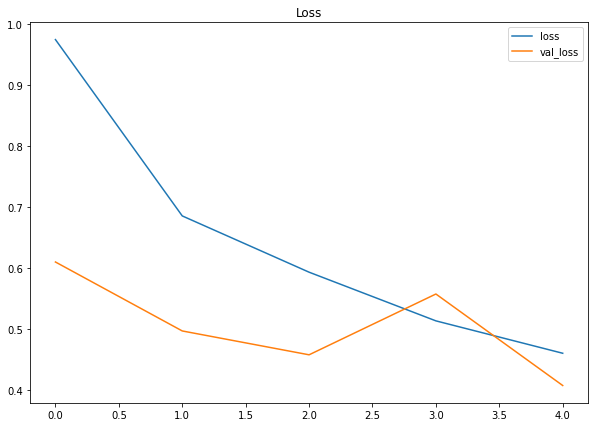

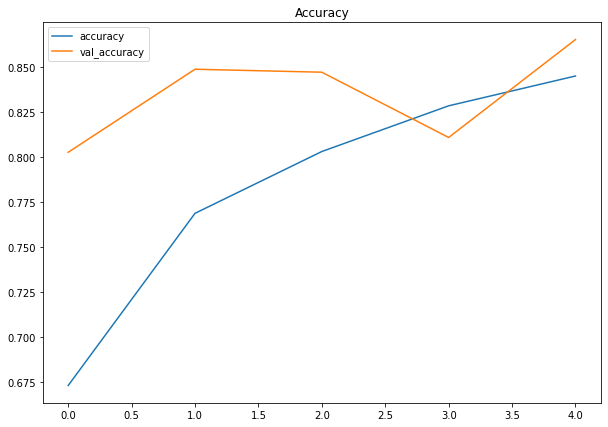

In [38]:
#Plot loss curves
plot_training_curve(history_model_5)

## Model 6: EffeicientNet B0 V2 21k / 1k

In [40]:
import tensorflow_hub as hub

IMAGE_SHAPE = (224,224)

efficientnet_v2_21k = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2"

efficientnet_layer_v2_21k = hub.KerasLayer(efficientnet_v2_21k ,input_shape=(224,224,3), trainable=False)

In [41]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

#Build the model 
inputs = layers.Input(shape=(224,224,3))
x = efficientnet_layer_v2_21k(inputs)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_6 = tf.keras.Model(inputs, outputs)

In [42]:
#Compile the model 
model_6.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [43]:
model_6.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
keras_layer_2 (KerasLayer)   (None, 1280)              5919312   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               655872    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 6,740,698
Trainable params: 821,386
Non-trainable params: 5,919,312
___________________________________________

In [44]:
#Fit the model 
history_model_6 = model_6.fit(train_data_augmented,
                              epochs=5,
                              validation_data=test_data_gen,
                              validation_steps=int(0.25*len(test_data_gen)),
                              callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5, verbose=1),
                                         tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

Epoch 1/5
235/235 [==============================] - 131s 527ms/step - loss: 0.7407 - accuracy: 0.7604 - val_loss: 0.3006 - val_accuracy: 0.9013
Epoch 2/5
235/235 [==============================] - 124s 528ms/step - loss: 0.5021 - accuracy: 0.8375 - val_loss: 0.2908 - val_accuracy: 0.8997
Epoch 3/5
235/235 [==============================] - 125s 530ms/step - loss: 0.4238 - accuracy: 0.8651 - val_loss: 0.2609 - val_accuracy: 0.9145
Epoch 4/5
235/235 [==============================] - 123s 524ms/step - loss: 0.3766 - accuracy: 0.8776 - val_loss: 0.3099 - val_accuracy: 0.9079
Epoch 5/5
235/235 [==============================] - 124s 526ms/step - loss: 0.3398 - accuracy: 0.8844 - val_loss: 0.2296 - val_accuracy: 0.9194


In [45]:
#Evaluate
model_6.evaluate(test_data_gen)

79/79 [==============================] - 15s 187ms/step - loss: 0.2647 - accuracy: 0.9180


[0.2647254765033722, 0.9179999828338623]

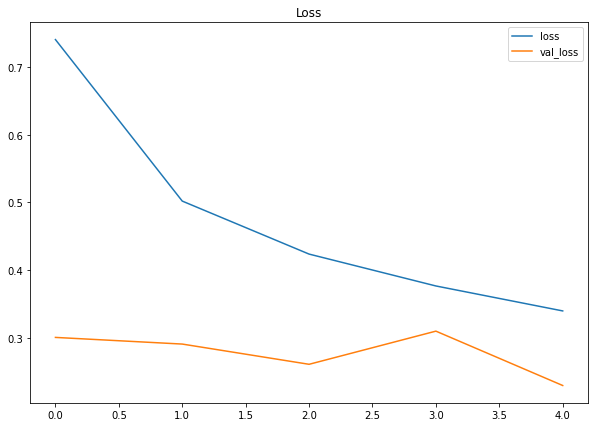

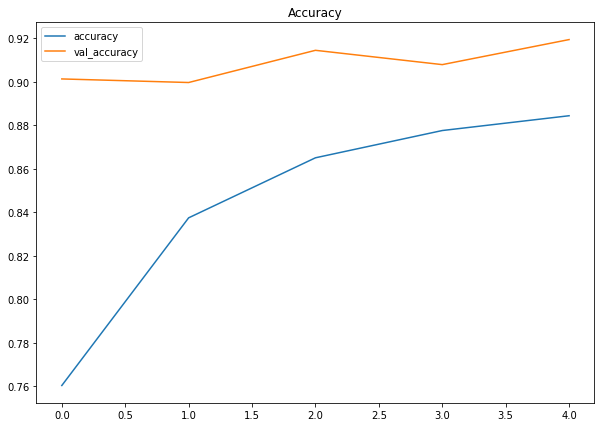

In [46]:
#Plot loss curves
plot_training_curve(history_model_6)